In [1]:
import nbformat

# ✅ ENKEL het pad, zonder 'path ='
path = "/home/sabih/IV-KI-2025/docs/Visualisatie.ipynb"

with open(path, encoding="utf8") as f:
    nb = nbformat.read(f, as_version=4)

for cell in nb['cells']:
    if cell['cell_type'] == 'code':
        tags = cell.setdefault('metadata', {}).setdefault('tags', [])
        if 'hide-input' not in tags:
            tags.append('hide-input')

with open(path, 'w', encoding="utf8") as f:
    nbformat.write(nb, f)


In [2]:
# All imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import calendar

# from pyaxis import pyaxis

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

FileNotFoundError: [Errno 2] No such file or directory: 'docs/Visualisatie.ipynb'

# Visualisatie

In [3]:
# Laad alle datasets

# df_CPI_processed = pd.read_csv('processed_data/CPI_2024-2024.csv')
df_WDI_all = pd.read_csv('dataset_sources/WDI_Data.csv')
df_annual_net_earnings_processed = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')

## Perspectief 1

In [4]:
# Schrijf en maak visualisaties voor pespectief 1 hier; origineel te vinden in notebook.ipynb

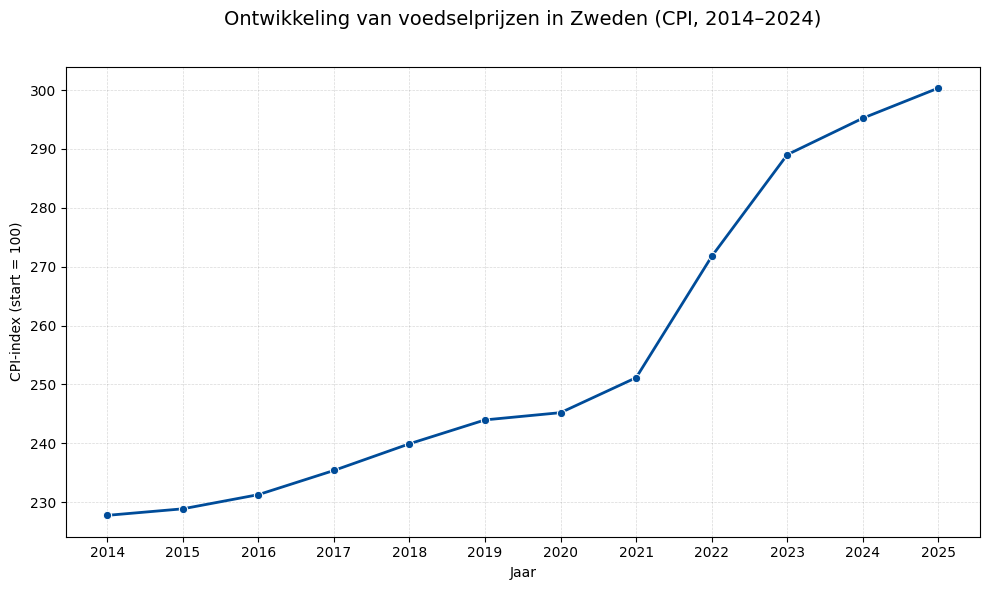

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("processed_data/CPI.csv")


df['month'] = pd.to_datetime(df['month'].str.replace('M', '-'), format='%Y-%m')
df = df.sort_values('month')


df['monthly_change'] = df['DATA']
df['cpi_index'] = 100.0
for i in range(1, len(df)):
    prev = df.loc[i-1, 'cpi_index']
    change = df.loc[i, 'monthly_change']
    df.loc[i, 'cpi_index'] = prev * (1 + change / 100)


df['year'] = df['month'].dt.year
yearly_cpi = df.groupby('year')['cpi_index'].mean().reset_index()


fig, ax = plt.subplots(figsize=(10, 6))


sns.lineplot(data=yearly_cpi, x='year', y='cpi_index',
             marker='o', linewidth=2, color='#004c99', ax=ax)


plt.title("Ontwikkeling van voedselprijzen in Zweden (CPI, 2014–2024)",
          fontsize=14, pad=30)
plt.xlabel("Jaar")
plt.ylabel("CPI-index (start = 100)")
plt.xticks(yearly_cpi['year'])


ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.subplots_adjust(top=0.88)
plt.tight_layout()

plt.show()


Deze grafiek toont de ontwikkeling van het CPI(consumer price index) tussen 2014 en 2024 voor Zweden. Voor 2014 is er een start waarde van 100 genomen. Het CPI is duidelijk gestegen in de afgelopen 10 jaar en vooral vanaf 2021. Dat betekend dat de gemiddelde kosten van levensonderhoud zijn toegenomen. 

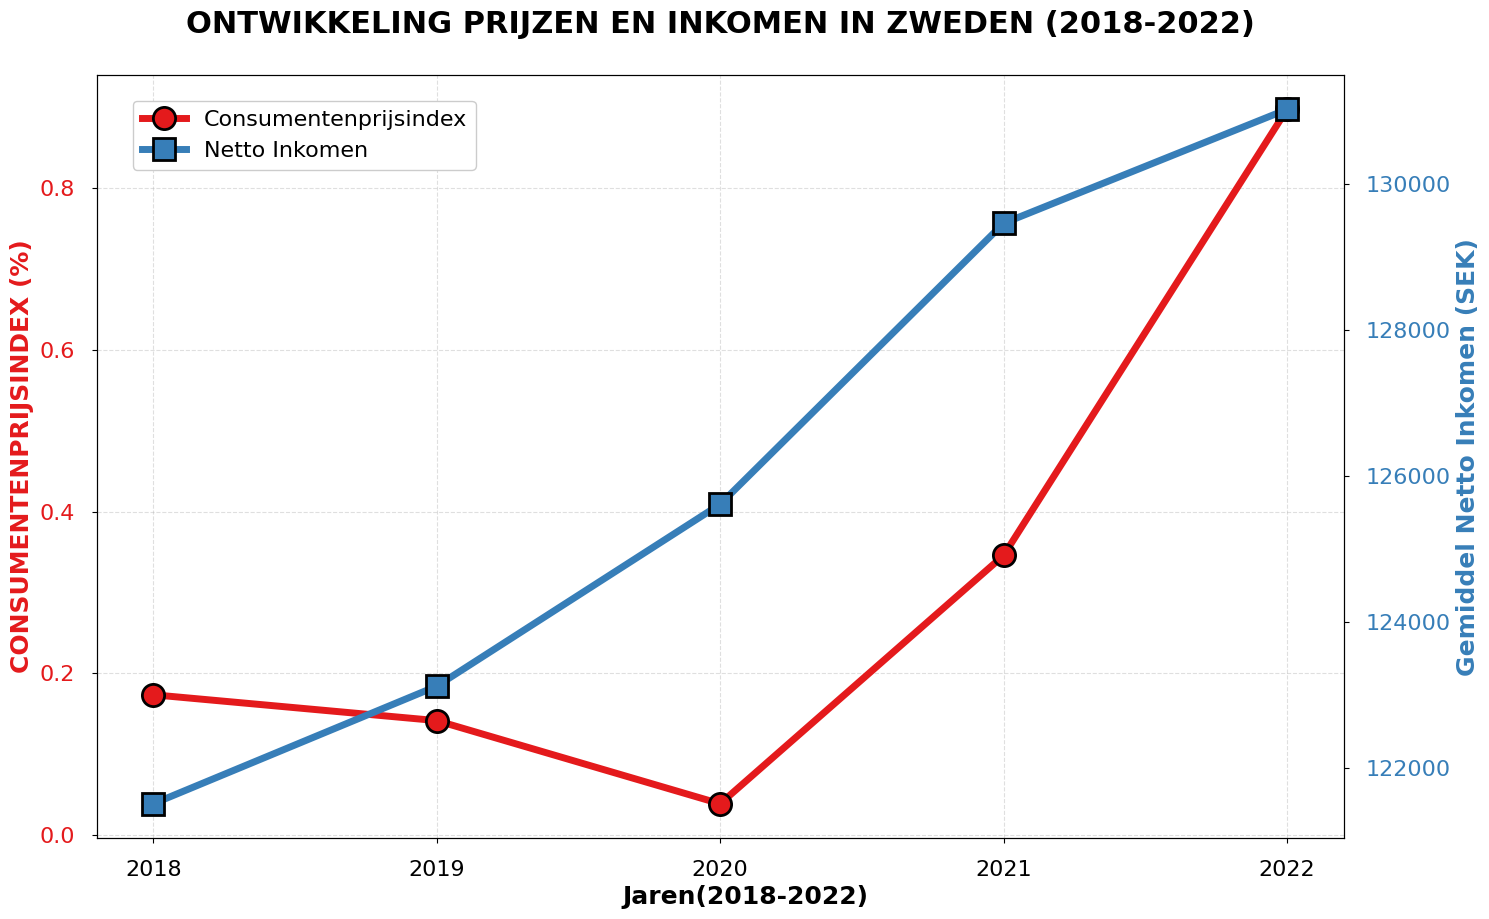

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Laad de verwerkte datasets
df_CPI = pd.read_csv('processed_data/CPI.csv')  
df_income = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')

# Verwerk data
df_CPI['Year'] = df_CPI['month'].str.extract(r'(\d{4})').astype(int)
avg_cpi_per_year = df_CPI.groupby('Year')['DATA'].mean()
avg_income_per_year = df_income.groupby('TIME_PERIOD')['OBS_VALUE'].mean()

# Filter voor 2018-2022
years_range = range(2018, 2023)
avg_cpi_per_year = avg_cpi_per_year[avg_cpi_per_year.index.isin(years_range)]
avg_income_per_year = avg_income_per_year[avg_income_per_year.index.isin(years_range)]

# Maak de visualisatie
plt.figure(figsize=(15, 9))

# CPI (rode lijn)
ax1 = plt.gca()
color = '#e41a1c'
ax1.set_xlabel('', fontsize=0)  # Verwijder x-as label
ax1.set_ylabel('CONSUMENTENPRIJSINDEX (%)', 
              color=color, fontsize=18, fontweight='bold', linespacing=1.8)
price_line = ax1.plot(avg_cpi_per_year.index, avg_cpi_per_year.values, 
                     'o-', color=color, linewidth=5, markersize=16,
                     markeredgecolor='black', markeredgewidth=2, 
                     label='Consumentenprijsindex')[0]

# Grotere tick labels
ax1.tick_params(axis='y', labelcolor=color, labelsize=16, pad=12)
ax1.set_xticks(list(years_range))
ax1.tick_params(axis='x', labelsize=16, pad=12)

# Netto inkomen (blauwe lijn)
ax2 = ax1.twinx()
color = '#377eb8'
ax2.set_ylabel('Gemiddel Netto Inkomen (SEK)', 
              color=color, fontsize=18, fontweight='bold', linespacing=1.8)
income_line = ax2.plot(avg_income_per_year.index, avg_income_per_year.values, 
                      's-', color=color, linewidth=5, markersize=16,
                      markeredgecolor='black', markeredgewidth=2, 
                      label='Netto Inkomen')[0]
ax2.tick_params(axis='y', labelcolor=color, labelsize=16, pad=12)

# Titel
plt.title('ONTWIKKELING PRIJZEN EN INKOMEN IN ZWEDEN (2018-2022)', 
          fontsize=22, pad=30, fontweight='bold')

# Legenda
lines = [price_line, income_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', fontsize=16, 
           bbox_to_anchor=(0.02, 0.98), framealpha=1)

# Grid en layout
ax1.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Voeg JAAR label toe onder de x-as
plt.figtext(0.5, -0.01, 'Jaren(2018-2022)', ha='center', fontsize=18, fontweight='bold')

plt.show()

De rode lijn toont de maandelijkse procentuele verandering in voedselprijzen (CPI)
De blauwe lijn toont het gemiddelde netto inkomen in SEK
Positieve CPI waarden duiden op prijsstijgingen, negatieve op dalingen
Data bronnen: Statistics Sweden en Eurostat

## Perspectief 2

In [7]:
# Schrijf en maak visualisaties voor pespectief 1 hier; origineel te vinden in notebook.ipynb